# Chapter 3
### - Video 1: Visualizing the PCA(Principle Compoent Analysis) transformation
#### - Dimension reduction

##### - Dimension reduction finds patterns in data, and uses these patterns to re-express it in a compressed form. 

##### - This makes subsequent computation with the data much more efficient, and this can be a big deal in a world of big datasets. 

##### - However, the most important function of dimension reduction is to reduce a dataset to its "bare bones", 

##### - discarding noisy features that cause big problems for supervised learning tasks like regression and classification. 

##### - PCA performs dimension reduction in two steps, and the first one, called "de-correlation", doesn't change the dimension of the data at all. 

#### - PCA applcation
##### - In first step, PCA rotates the samples so that they are aligned with the coordinate axes. PCA also shifts the samples so that they have mean zero
##### - No information is lost - this is true no matter how many features your dataset has. 
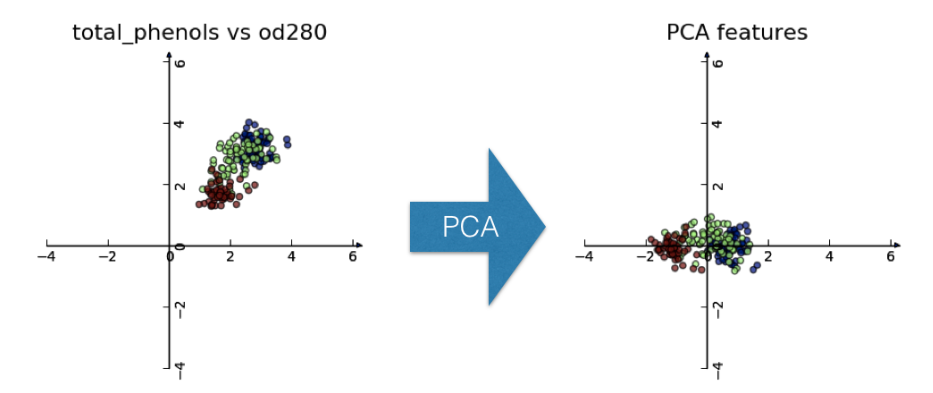

##### - For PCA, scikit-learn has fit and transform methods just like StandardScaler. 
##### - The fit method learns how to shift and how to rotate the samples, but doesn't actually change them. 
##### - The transform method, on the other hand, applies the transformation that fit learned, can be applied to new, unseen samples.

##### - After transform, new array has the same number of rows and columns as the original sample array.There is one row for each transformed sample. 
##### - The columns of the new array correspond to "PCA features", just as the original features corresponded to columns of the original array.

#### -  PCA features are not correlated
##### - It is often the case that the features of a dataset are correlated. 
##### - PCA, "de-correlates" the data, in the sense that the columns of the transformed array are not linearly correlated.

#### -  Pearson correlation
##### - Linear correlation can be measured with the Pearson correlation. 
##### - It takes values between -1 and 1, where larger values indicate a stronger correlation, and 0 indicates no linear correlation. 

#### - Principal components
##### - After a PCA model has been fit, the principal components are available as the components attribute. model.compoents_
##### - This is numpy array with one row for each principal component. each row defines displacement with mean.


In [ ]:
# Video example code:

from sklearn.decomposition import PCA
model = PCA()
model.fit(samples)
transformed = model.transform(samples)

# Exercise 1:Correlated data in nature
# You are given an array grains giving the width and length of samples of grain. You suspect that width and length will be correlated. 
# To confirm this, make a scatter plot of width vs length and measure their Pearson correlation.
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = grains[:,0] 

# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width,length)

# Display the correlation
print(correlation)

# Exercise 2: Decorrelating the grain measurements with PCA
# You observed in the previous exercise that the width and length measurements of the grain are correlated. 
# Now, you'll use PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation.
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)


### Video 2: Intrinsic dimension
#### - 2. Intrinsic dimension of a flight path
##### - Consider this dataset with 2 features: latitude and longitude. These two features might track the flight of an airplane, for example. This dataset is 2-dimensional, yet it turns out that it can be closely approximated using only one feature: the displacement along the flight path. This dataset is intrinsically one-dimensional.

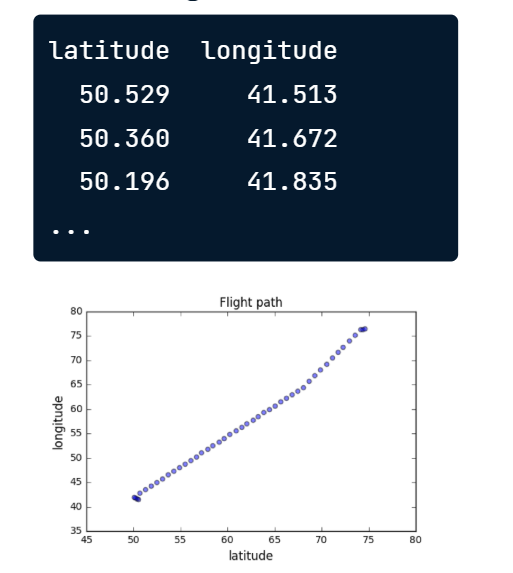

#### - 3. Intrinsic dimension
##### - The intrinsic dimension of a dataset is the number of features required to approximate it. The intrinsic dimension informs dimension reduction, because it tells us how much a dataset can be compressed. 

##### - To better illustrate the intrinsic dimension, let's consider an example dataset containing only some of the samples from the iris dataset. Specifically, let's take three measurements from the iris versicolor samples: sepal length, sepal width, and petal width. So each sample is represented as a point in 3-dimensional space.

##### - However, if we make a 3d scatter plot of the samples, we see that they all lie very close to a flat, 2-dimensional sheet. This means that the data can be approximated by using only two coordinates, without losing much information. So this dataset has intrinsic dimension 2.

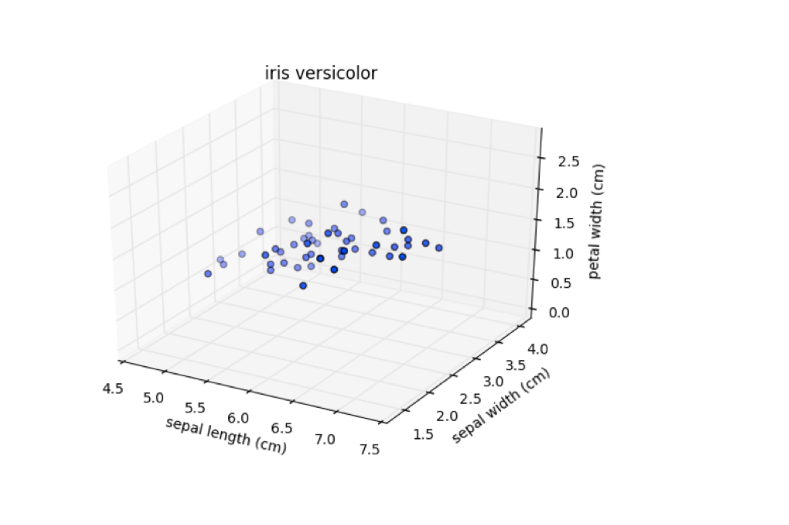

##### - But scatter plots are only possible if there are 3 features or less. So how can the intrinsic dimension be identified, even if there are many features? This is where PCA is really helpful. The intrinsic dimension can be identified by counting the PCA features that have high variance. To see how, let's see what happens when PCA is applied to the dataset of versicolor samples.

#### - 7. PCA of the versicolor samples
##### - PCA rotates and shifts the samples to align them with the coordinate axes. This expresses the samples using three PCA features.

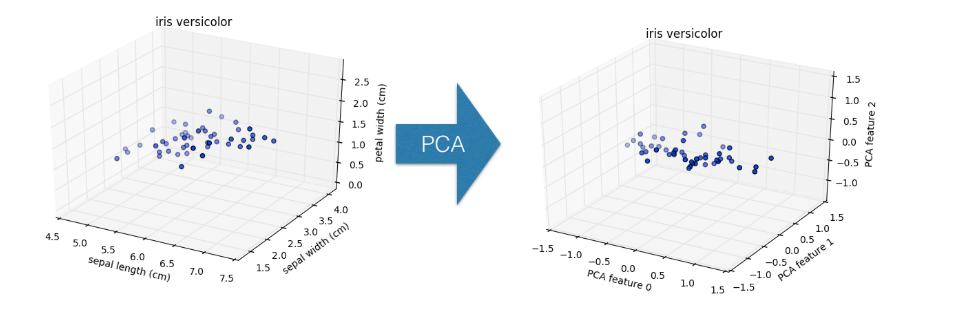

#### 8. PCA features are ordered by variance descending
##### - The PCA features are in a special order. Here is a bar graph showing the variance of each of the PCA features. As you can see, each PCA feature has less variance than the last, and in this case the last PCA feature has very low variance. This agrees with the scatter plot of the PCA features, where the samples don't vary much in the vertical direction. In the other two directions, however, the variance is apparent.

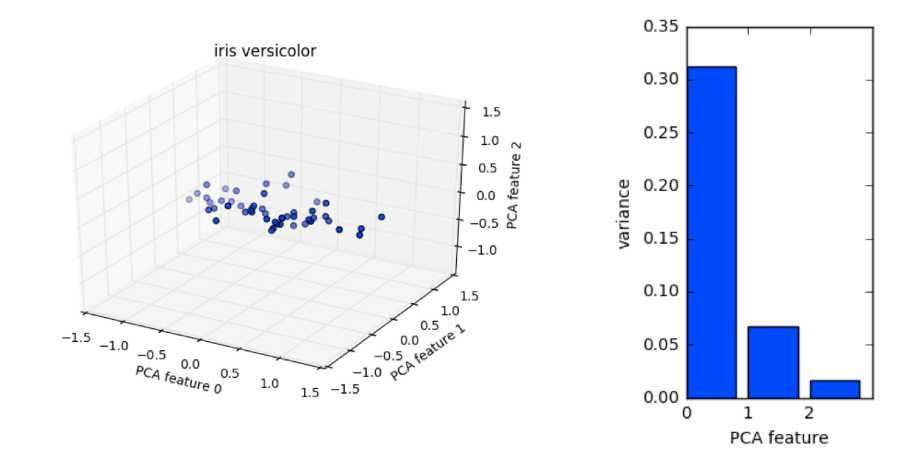

##### - The intrinsic dimension is the number of PCA features that have significant variance. In our example, only the first two PCA features have significant variance. So this dataset has intrinsic dimension 2, which agrees with what we observed when inspecting the scatter plot.

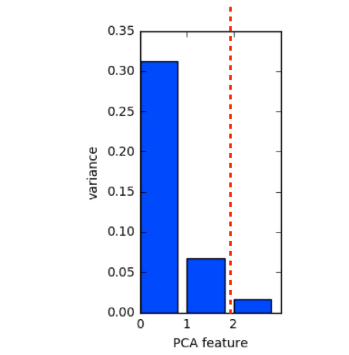

##### - Let's see how to plot the variances of the PCA features in practice. Firstly, make the necessary imports. Then create a PCA model, and fit it to the samples. Now create a range enumerating the PCA features,

pca = PCA()
pca.fit(samples)
features = range(pca.n_components_)

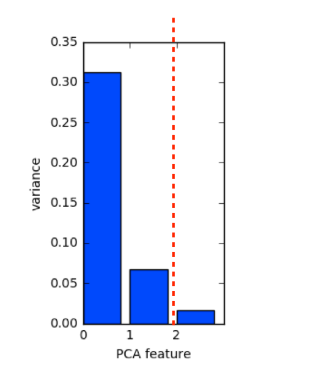

##### - and make a bar plot of the variances; the variances are available as the explained_variance attribute of the PCA model.

#### 12. Intrinsic dimension can be ambiguous
##### - The intrinsic dimension is a useful idea that helps to guide dimension reduction. However, it is not always unambiguous. Here is a graph of the variances of the PCA features for the wine dataset. We could argue for an intrinsic dimension of 2, of 3, or even more, depending upon the threshold you chose.
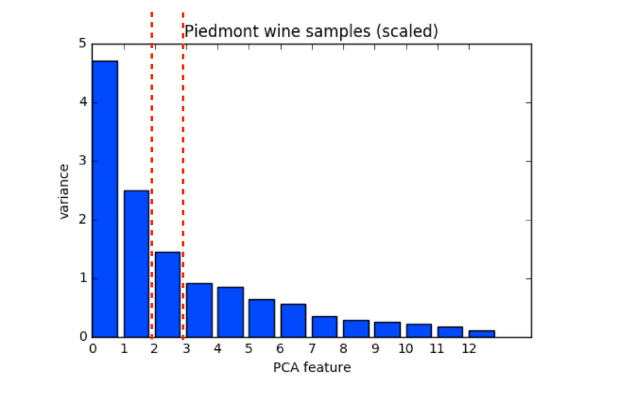

In [ ]:
# Exercise 1: The first principal component
# The first principal component of the data is the direction in which the data varies the most. 
# In this exercise, your job is to use PCA to find the first principal component of the length and width measurements of the grain samples, 
# and represent it as an arrow on the scatter plot.
# The array grains gives the length and width of the grain samples.

# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

# Exercise 2: Variance of the PCA features
# The fish dataset is 6-dimensional. But what is its intrinsic dimension? 
# Make a plot of the variances of the PCA features to find out. As before, samples is a 2D array, where each row represents a fish. 
# You'll need to standardize the features first.
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


### Video 3: Dimension reduction with PCA
#### 2. Dimension reduction
Dimension reduction represents the same data using less features and is vital for building machine learning pipelines using real-world data. Finally, in this video, you'll learn how to perform dimension reduction using PCA.

3. Dimension reduction with PCA
We've seen already that the PCA features are in decreasing order of variance. PCA performs dimension reduction by discarding the PCA features with lower variance, which it assumes to be noise, and retaining the higher variance PCA features, which it assumes to be informative.
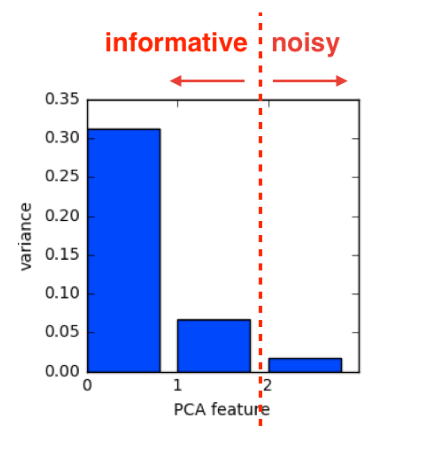

5. Dimension reduction with PCA
To use PCA for dimension reduction, you need to specify how many PCA features to keep. For example, specifying n_components=2 when creating a PCA model tells it to keep only the first two PCA features. A good choice is the intrinsic dimension of the dataset, if you know it. Let's consider an example right away.

6. Dimension reduction of iris dataset
The iris dataset has 4 features representing the 4 measurements. Here, the measurements are in a numpy array called samples. Let's use PCA to reduce the dimension of the iris dataset to only 2. Begin by importing PCA as usual. Create a PCA model specifying n_components=2, and then fit the model and transform the samples as usual. Printing the shape of the transformed samples, we see that there are only two features, as expected.


8. Iris dataset in 2 dimensions
Here is a scatterplot of the two PCA features, where the colors represent the three species of iris. Remarkably, despite having reduced the dimension from 4 to 2, the species can still be distinguished. Remember that PCA didn't even know that there were distinct species. PCA simply took the 2 PCA features with highest variance. As we can see, these two features are very informative.
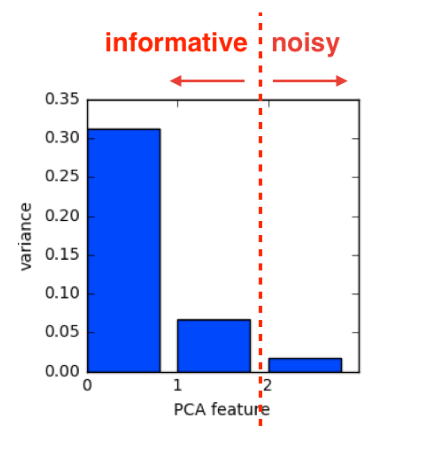

10. Dimension reduction with PCA
PCA discards the low variance features, and assumes that the higher variance features are informative. Like all assumptions, there are cases where this doesn't hold. As we saw with the iris dataset, however, it often does in practice.

11. Word frequency arrays
In some cases, an alternative implementation of PCA needs to be used. Word frequency arrays are a great example. In a word-frequency array, each row corresponds to a document, and each column corresponds to a word from a fixed vocabulary. The entries of the word-frequency array measure how often each word appears in each document. Only some of the words from the vocabulary appear in any one document, so most entries of the word frequency array are zero.
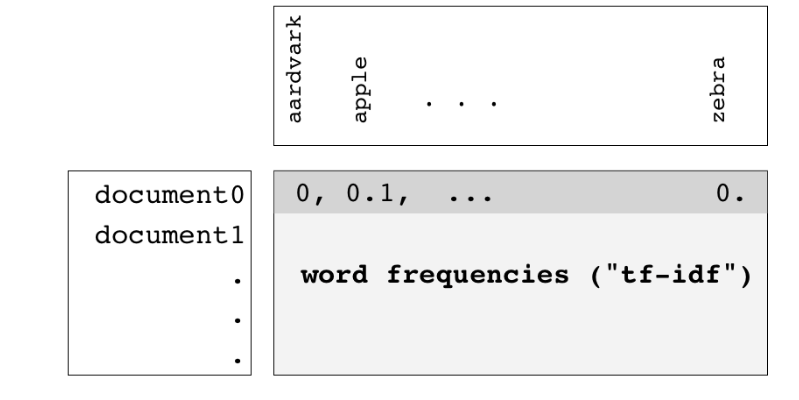

13. Sparse arrays and csr_matrix
Arrays like this are said to be "sparse", and are often represented using a special type of array called a "csr_matrix". csr_matrices save space by remembering only the non-zero entries of the array.
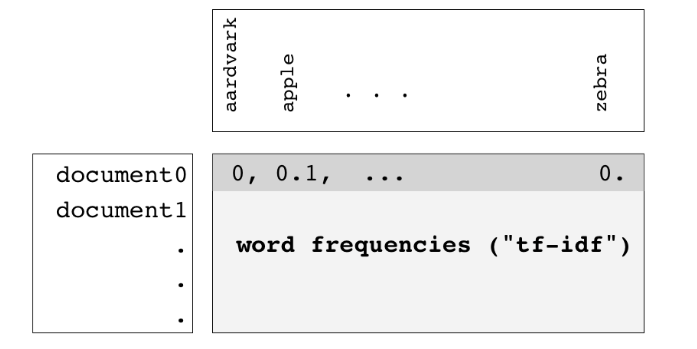

15. TruncatedSVD and csr_matrix
Scikit-learn's PCA doesn't support csr_matrices, and you'll need to use TruncatedSVD instead. TruncatedSVD performs the same transformation as PCA, but accepts csr matrices as input. Other than that, you interact with TruncatedSVD and PCA in exactly the same way.

from sklearn.decomposition import TruncatedSVD
model = TruncatedSVD(n_components=3)
model.fit(documents)
transformed = model.transform(documents)

In [ ]:
# Exercise 1: Dimension reduction of the fish measurements
# In a previous exercise, you saw that 2 was a reasonable choice for the "intrinsic dimension" of the fish measurements. 
# Now use PCA for dimensionality reduction of the fish measurements, retaining only the 2 most important components.
# Import PCA
from sklearn.decomposition import PCA 

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)

# Exercise 2: A tf-idf word-frequency array
# In this exercise, you'll create a tf-idf word frequency array for a toy collection of documents. 
# For this, use the TfidfVectorizer from sklearn. It transforms a list of documents into a word frequency array, which it outputs as a csr_matrix. 
# It has fit() and transform() methods like other sklearn objects.
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)

# Exercise 3: Clustering Wikipedia part I
# You saw in the video that TruncatedSVD is able to perform PCA on sparse arrays in csr_matrix format, such as word-frequency arrays. 
# Combine your knowledge of TruncatedSVD and k-means to cluster some popular pages from Wikipedia. 
# In this exercise, build the pipeline. In the next exercise, you'll apply it to the word-frequency array of some Wikipedia articles.

# Create a Pipeline object consisting of a TruncatedSVD followed by KMeans. 
# (This time, we've precomputed the word-frequency matrix for you, so there's no need for a TfidfVectorizer).

# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd,kmeans)

# Exercise 4: Clustering Wikipedia part II
# It is now time to put your pipeline from the previous exercise to work! 
# You are given an array articles of tf-idf word-frequencies of some popular Wikipedia articles, and a list titles of their titles. 
# Use your pipeline to cluster the Wikipedia articles
# Import pandas
import pandas as pd

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))